In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:

%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
!kaggle datasets download -d rezaghari/friends-series-dataset

  0% 0.00/40.0k [00:00<?, ?B/s]
100% 40.0k/40.0k [00:00<00:00, 5.43MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  friends-series-dataset.zip
replace friends_episodes_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace friends_episodes_v3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('friends_episodes_v2.csv',encoding='ISO-8859-1')
df_3=pd.read_csv('friends_episodes_v3.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


In [ ]:
df.shape

(235, 8)

In [ ]:
df.isna().sum()

Year_of_prod     0
Season           0
Episode_Title    0
Duration         0
Summary          0
Director         0
Stars            0
Votes            0
dtype: int64

In [ ]:
df['Director'].value_counts()[:10]

Gary Halvorson     54
Kevin Bright       54
Michael Lembeck    24
James Burrows      14
Gail Mancuso       14
Peter Bonerz       12
David Schwimmer    10
Ben Weiss          10
Shelley Jensen      6
Robby Benson        6
Name: Director, dtype: int64

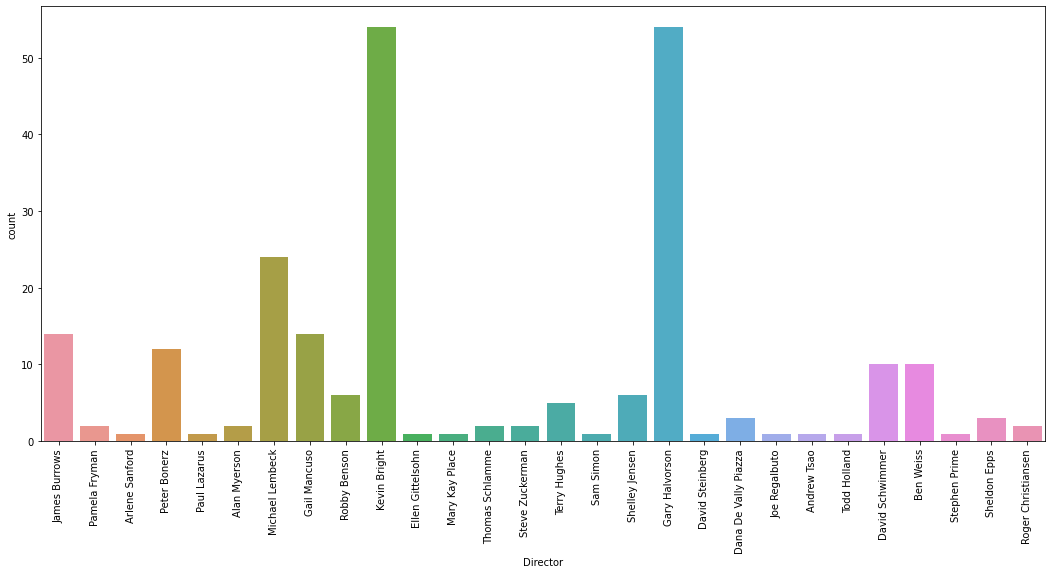

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)

sns.countplot(x='Director',data=df)

In [ ]:
print(df['Votes'].mean())
print(df['Votes'].max())
print(df['Votes'].min())

3352.285106382979
10381
2557


In [ ]:
print(df['Stars'].mean())
print(df['Stars'].max())
print(df['Stars'].min())

8.459574468085108
9.7
7.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


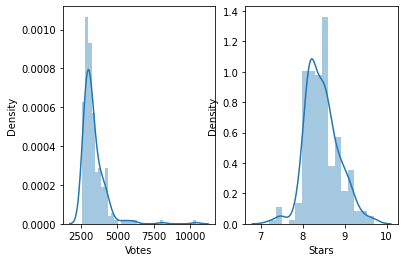

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df['Votes'])
plt.subplot(1,2,2)
sns.distplot(df['Stars'])

# lets try and find ratings by season and by director

In [ ]:
s01=df[df['Season']==1]
s02=df[df['Season']==2]
s03=df[df['Season']==3]
s04=df[df['Season']==4]
s05=df[df['Season']==5]
s06=df[df['Season']==6]
s07=df[df['Season']==7]
s08=df[df['Season']==8]
s09=df[df['Season']==9]
s10=df[df['Season']==10]

In [ ]:
s01_mean=s01['Stars'].mean()
s02_mean=s02['Stars'].mean()
s03_mean=s03['Stars'].mean()
s04_mean=s04['Stars'].mean()
s05_mean=s05['Stars'].mean()
s06_mean=s06['Stars'].mean()
s07_mean=s07['Stars'].mean()
s08_mean=s08['Stars'].mean()
s09_mean=s09['Stars'].mean()
s10_mean=s10['Stars'].mean()

Text(0, 0.5, 'average ratings')

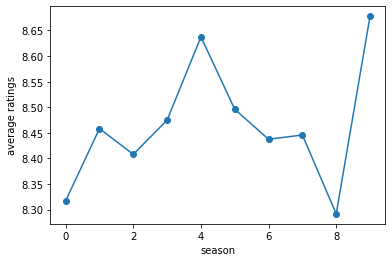

In [ ]:
plt.plot([s01_mean,s02_mean,s03_mean,s04_mean,s05_mean,s06_mean,s07_mean,s08_mean,s09_mean,s10_mean],marker='o')
plt.xlabel('season')
plt.ylabel('average ratings')

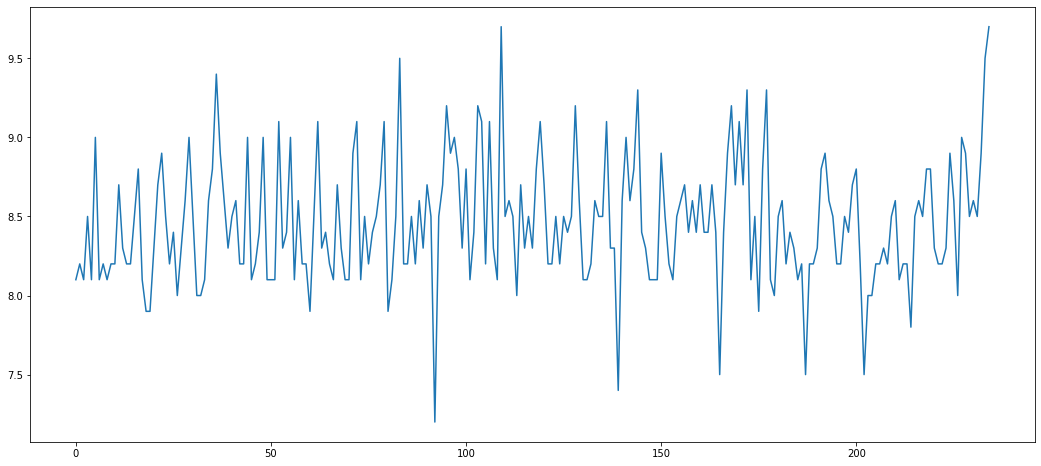

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df['Stars'])

In [ ]:
df['Stars'].mean()

8.459574468085108

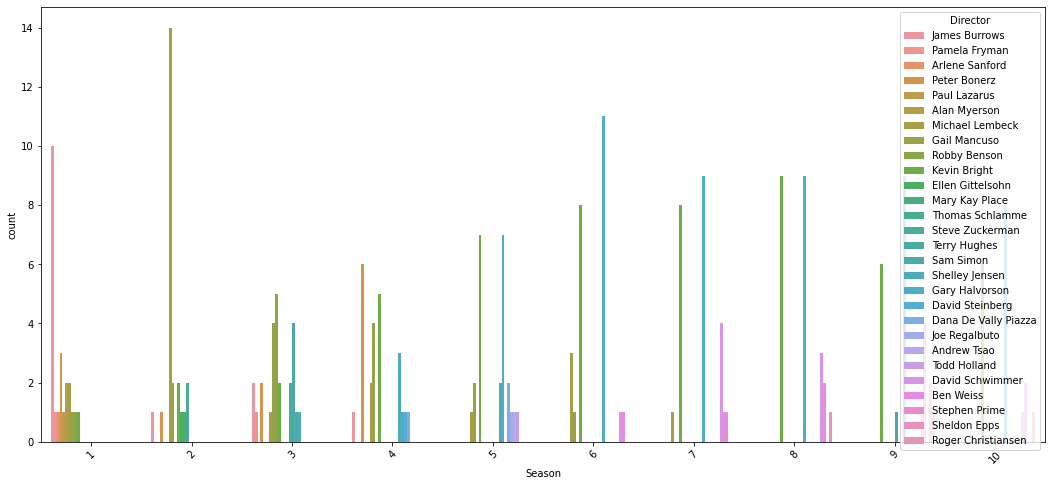

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
sns.countplot(x='Season',hue='Director',data=df)

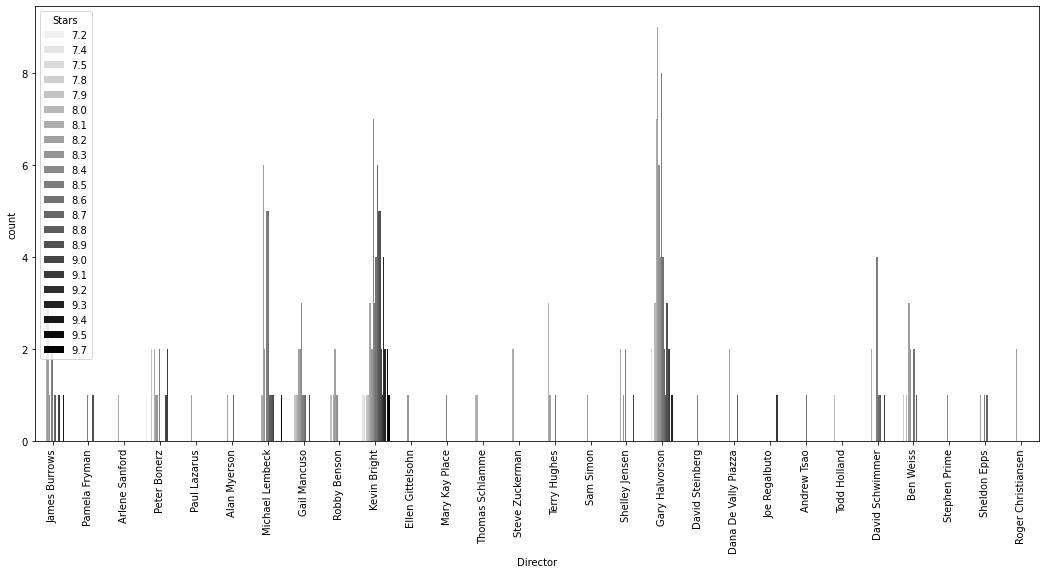

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.countplot(x='Director',hue='Stars',data=df,color='black')

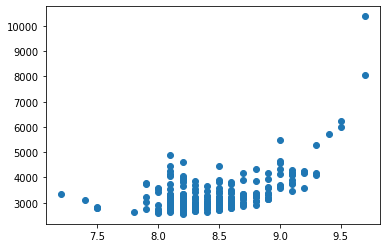

In [ ]:

plt.scatter(df['Stars'],df['Votes'])

In [ ]:
#no of episdoes in each seaosn

In [ ]:
s01.Episode_Title.nunique()

23

In [ ]:
no_of_ep = df.groupby("Season").count()["Episode_Title"]
print(no_of_ep.index)
print(no_of_ep.values)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Season')
[23 24 25 24 24 25 24 24 24 18]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


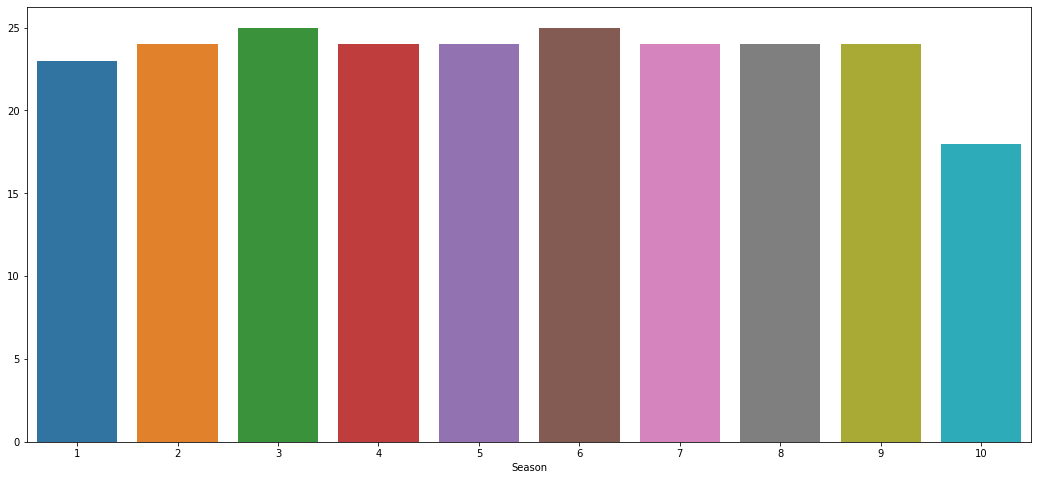

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(no_of_ep.index,no_of_ep.values)

In [ ]:
dur_of_ep = df.groupby("Season").sum()["Duration"]
print(no_of_ep.index)
print(no_of_ep.values)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Season')
[23 24 25 24 24 25 24 24 24 18]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


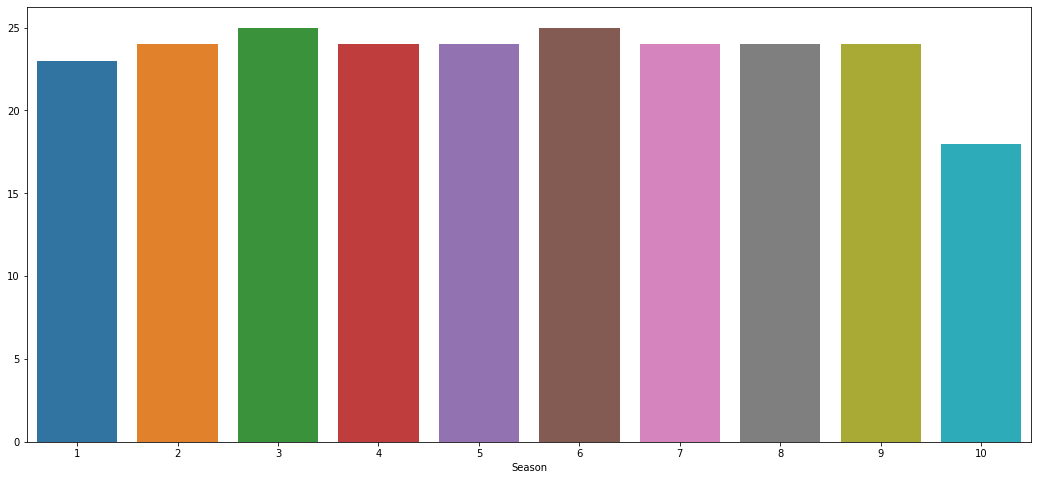

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(no_of_ep.index,no_of_ep.values)